Populating the interactive namespace from numpy and matplotlib


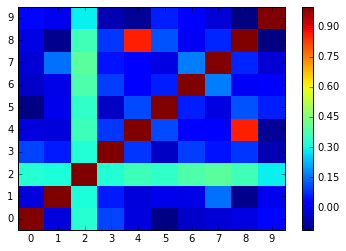

In [3]:
from numpy import corrcoef, sum, log, arange
from numpy.random import rand
from pylab import pcolor, show, colorbar, xticks, yticks
%pylab inline
#THIS IS A TEST!!!!!!
# generating some uncorrelated data
data = rand(10,100) # each row of represents a variable

# creating correlation between the variables
# variable 2 is correlated with all the other variables
data[2,:] = sum(data,0)
# variable 4 is correlated with variable 8
data[4,:] = log(data[8,:])*0.5

# plotting the correlation matrix
R = corrcoef(data)
pcolor(R)
colorbar()
yticks(arange(0.5,10.5),range(0,10))
xticks(arange(0.5,10.5),range(0,10))
show()

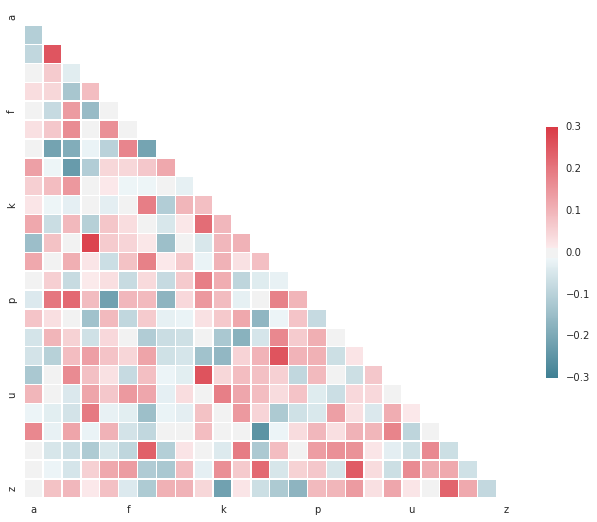

In [9]:
from string import ascii_letters as letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(letters[:26]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [15]:
import numpy as np

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.sampledata.les_mis import data


nodes = data['nodes']
names = [node['name'] for node in sorted(data['nodes'], key=lambda x: x['group'])]

N = len(nodes)
counts = np.zeros((N, N))
for link in data['links']:
    counts[link['source'], link['target']] = link['value']
    counts[link['target'], link['source']] = link['value']

colormap = ["#444444", "#a6cee3", "#1f78b4", "#b2df8a", "#33a02c", "#fb9a99",
            "#e31a1c", "#fdbf6f", "#ff7f00", "#cab2d6", "#6a3d9a"]

xname = []
yname = []
color = []
alpha = []
for i, node1 in enumerate(nodes):
    for j, node2 in enumerate(nodes):
        xname.append(node1['name'])
        yname.append(node2['name'])

        alpha.append(min(counts[i,j]/4.0, 0.9) + 0.1)

        if node1['group'] == node2['group']:
            color.append(colormap[node1['group']])
        else:
            color.append('lightgrey')

source = ColumnDataSource(data=dict(
    xname=xname,
    yname=yname,
    colors=color,
    alphas=alpha,
    count=counts.flatten(),
))

p = figure(title="Les Mis Occurrences",
           x_axis_location="above", tools="hover,save",
           x_range=list(reversed(names)), y_range=names)

p.plot_width = 800
p.plot_height = 800
p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "5pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = np.pi/3

p.rect('xname', 'yname', 0.9, 0.9, source=source,
       color='colors', alpha='alphas', line_color=None)

p.select_one(HoverTool).tooltips = [
    ('names', '@yname, @xname'),
    ('count', '@count'),
]

#output_notebook("les_mis.html", title="les_mis.py example")

show(p) # show the plot

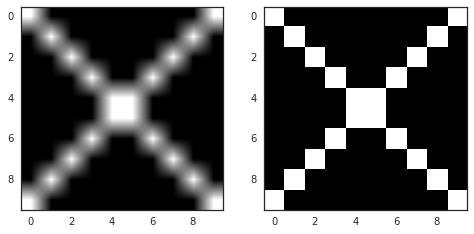

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Make an array with ones in the shape of an 'X'
a = np.eye(10,10)
a += a[::-1,:]

fig = plt.figure()
ax1 = fig.add_subplot(121)
# Bilinear interpolation - this will look blurry
ax1.imshow(a, cmap=cm.Greys_r)

ax2 = fig.add_subplot(122)
# 'nearest' interpolation - faithful but blocky
ax2.imshow(a, interpolation='nearest', cmap=cm.Greys_r)

plt.show()

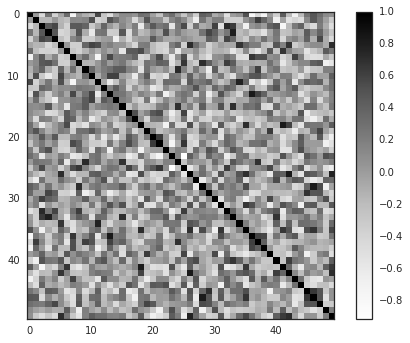

In [17]:
import numpy as np
import matplotlib.pyplot as plt

b = []
for i in range(50):
    a = np.random.normal(5,i+1,10)
    b.append(a)

c = np.array(b)

cm =np.corrcoef(c)

plt.imshow(cm,interpolation='nearest')
plt.colorbar()
plt.show()

http://www.datasciencecentral.com/profiles/blogs/opensource-python-visualization-libraries

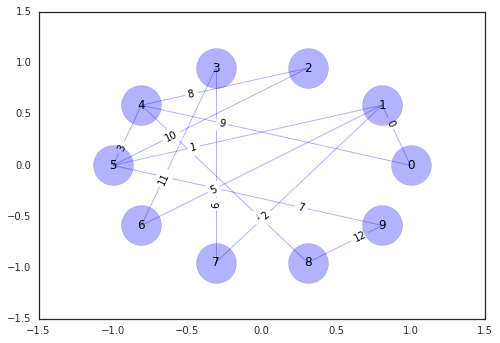

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(graph, labels=None, graph_layout='shell',
               node_size=1600, node_color='blue', node_alpha=0.3,
               node_text_size=12,
               edge_color='blue', edge_alpha=0.3, edge_tickness=1,
               edge_text_pos=0.3,
               text_font='sans-serif'):

    # create networkx graph
    G=nx.Graph()

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    # these are different layouts for the network you may try
    # shell seems to work best
    if graph_layout == 'spring':
        graph_pos=nx.spring_layout(G)
    elif graph_layout == 'spectral':
        graph_pos=nx.spectral_layout(G)
    elif graph_layout == 'random':
        graph_pos=nx.random_layout(G)
    else:
        graph_pos=nx.shell_layout(G)

    # draw graph
    nx.draw_networkx_nodes(G,graph_pos,node_size=node_size, 
                           alpha=node_alpha, node_color=node_color)
    nx.draw_networkx_edges(G,graph_pos,width=edge_tickness,
                           alpha=edge_alpha,edge_color=edge_color)
    nx.draw_networkx_labels(G, graph_pos,font_size=node_text_size,
                            font_family=text_font)

    if labels is None:
        labels = range(len(graph))

    edge_labels = dict(zip(graph, labels))
    nx.draw_networkx_edge_labels(G, graph_pos, edge_labels=edge_labels, 
                                 label_pos=edge_text_pos)

    # show graph
    plt.show()

graph = [(0, 1), (1, 5), (1, 7), (4, 5), (4, 8), (1, 6), (3, 7), (5, 9),
         (2, 4), (0, 4), (2, 5), (3, 6), (8, 9)]

# you may name your edge labels
labels = map(chr, range(65, 65+len(graph)))
#draw_graph(graph, labels)

# if edge labels is not specified, numeric labels (0, 1, 2...) will be used
draw_graph(graph)

https://www.wakari.io/sharing/bundle/ijstokes/pyvis-1h?has_login=False

ftp://68.179.60.217/pub/Adam/EBOOKS/Learning%20IPython%20for%20Interactive%20Computing%20and%20Data%20Visualization.pdf
